In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Thanasis\Downloads\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

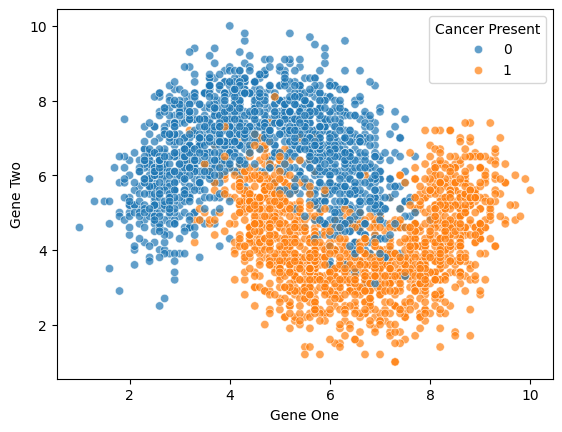

In [5]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

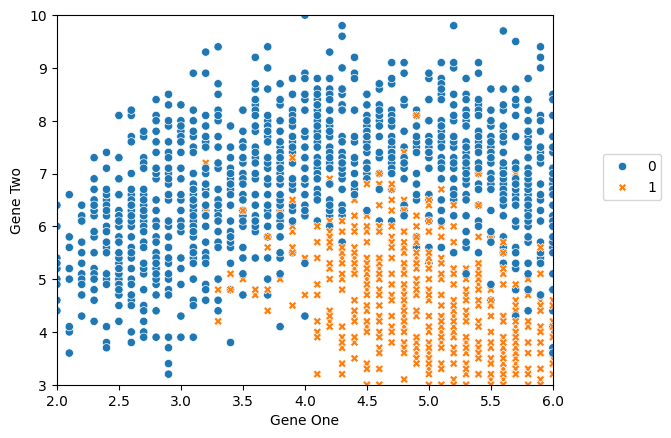

In [19]:
#we want to see the points thats overlapping

sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, style='Cancer Present')
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

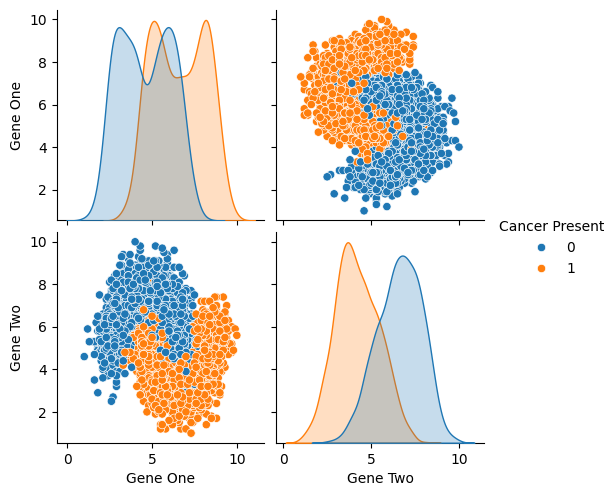

In [21]:
sns.pairplot(data=df, hue='Cancer Present')

#from the pictures, it seems fine to use KNN algorithm to predict new data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#scaling data in KNN is mandatory because it uses distance metrics to build out the model

scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#help(KNeighborsClassifier)

In [45]:
#Simplest KNN model with k=1 (its just Nearest Neighbor classifier)

knn_model = KNeighborsClassifier(n_neighbors=1)

In [47]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
y_pred = knn_model.predict(scaled_X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [53]:
#accuracy is just the percentage of the right predicted data

accuracy_score(y_test,y_pred)

0.9011111111111111

In [55]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [59]:
# Choosing K

In [61]:
#The so called elbow method (just run every k we want to check with a for loop
#and compare the errors)

test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

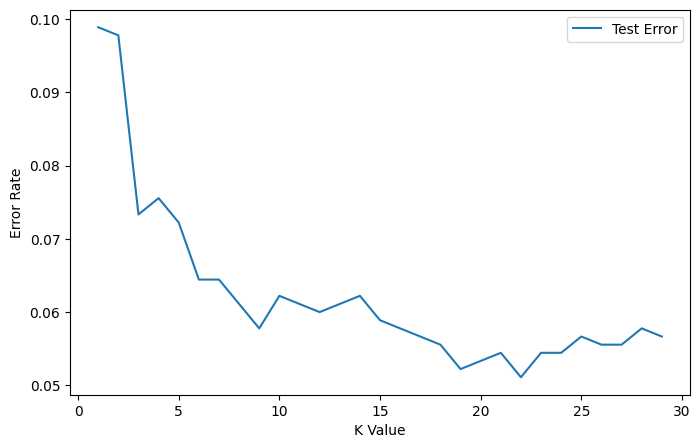

In [71]:
plt.figure(figsize=(8,5),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [73]:
#Best k seems to be k=22. But, with k=6 we have around 6.2% error rate and with k=22 we have around 5.3% error rate.
#k=22 doesnt worth the storage and time cost. Better go with k=6.

In [77]:
#Full Cross Validation with GridSearchCV

In [79]:
scaler = StandardScaler()

In [81]:
knn = KNeighborsClassifier()

In [83]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [87]:
# String code better matches variable name to avoid mistakes and errors
operations = [('scaler',scaler),('knn',knn)]

In [89]:
from sklearn.pipeline import Pipeline

In [93]:
# Pipelines is just a smart composition of functions. In our particular case it first scales data and then
# applies the knn model. We can adjust parameters in the functions inside the pipeline as shown below.

pipe = Pipeline(operations)

In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
k_values = list(range(1,20))

In [101]:
# this __ below adjust the hyperparameter n_neighboors of knn model inside the pipeline

param_grid = {'knn__n_neighbors': k_values}

In [103]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [105]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [109]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [111]:
# Mean scores of the five splits of cross validations for every k

full_cv_classifier.cv_results_['mean_test_score']

array([0.90380952, 0.90714286, 0.92142857, 0.91380952, 0.92380952,
       0.92047619, 0.92761905, 0.9252381 , 0.9247619 , 0.92285714,
       0.9252381 , 0.92428571, 0.92761905, 0.92809524, 0.92857143,
       0.93      , 0.92904762, 0.92857143, 0.92761905])

In [113]:
# So k=16 is the best parameter. Final model and evaluating on our hold-out Test Set.

In [115]:
scaler = StandardScaler()
knn16 = KNeighborsClassifier(n_neighbors=16)
operations = [('scaler',scaler),('knn16',knn16)]

In [117]:
pipe = Pipeline(operations)

In [119]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

In [121]:
pipe_pred = pipe.predict(X_test)

In [123]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [125]:
single_sample = X_test.iloc[40]

In [127]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [139]:
# Correct format as input.

single_sample.values.reshape(1, -1)

array([[3.8, 6.3]])

In [137]:
pipe.predict(single_sample.values.reshape(1, -1))

C:\Users\Thanasis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [131]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

C:\Users\Thanasis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.9375, 0.0625]])